In [4]:
pip install setuptools

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install git+https://github.com/ageitgey/face_recognition_models

  Cloning https://github.com/ageitgey/face_recognition_models to c:\users\user\appdata\local\temp\pip-req-build-tkxw2d97
  Resolved https://github.com/ageitgey/face_recognition_models to commit e67de717267507d1e9246de95692eb8be736ab61
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/ageitgey/face_recognition_models 'C:\Users\User\AppData\Local\Temp\pip-req-build-tkxw2d97'

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import face_recognition
import cv2
import numpy as np

In [8]:
def compare_and_mark_faces(main_image_path, target_image_path):
    # Load images
    main_image = face_recognition.load_image_file(main_image_path)
    target_image = face_recognition.load_image_file(target_image_path)

    # Find face locations and face encodings in both images using the CNN model
    main_face_locations = face_recognition.face_locations(main_image, model="cnn")
    target_face_locations = face_recognition.face_locations(target_image, model="cnn")

    # Find face encodings in both images
    main_face_encodings = face_recognition.face_encodings(main_image, main_face_locations)
    target_face_encodings = face_recognition.face_encodings(target_image, target_face_locations)

    # Create a copy of the original target image for drawing rectangles
    target_image_marked = np.copy(target_image)

    # Flag to check if the faces are exactly the same
    faces_are_same = False

    # Iterate through each face found in the target image
    for target_location, target_encoding in zip(target_face_locations, target_face_encodings):
        # Compare the face in the target image with faces in the main image
        matches = face_recognition.compare_faces(main_face_encodings, target_encoding)

        # If a match is found, mark the face in the original target image and set the flag to True
        if True in matches:
            top, right, bottom, left = target_location
            cv2.rectangle(target_image_marked, (left, top), (right, bottom), (0, 255, 0), 2)  # Green rectangle
            faces_are_same = True

    # Display the original target image with marked faces
    cv2.imshow('Original Target Image | Marked Faces', cv2.cvtColor(target_image_marked, cv2.COLOR_RGB2BGR))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Print result
    if faces_are_same:
        print("Faces are exactly the same.")
    else:
        print("Faces are different.")

# Example usage without resizing
main_image_path = 'main_image.jpg'
target_image_path = 'target_image.jpg'
compare_and_mark_faces(main_image_path, target_image_path)

Faces are exactly the same.


In [9]:
pip install matplotlib

  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 841.0 kB/s eta 0:00:03
   --------- ------------------------------ 0.5/2.2 MB 841.0 kB/s eta 0:00:03
   ------------------ --------------------- 1.0/2.2 MB 1.0 MB/s eta 0:00:02
   ------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

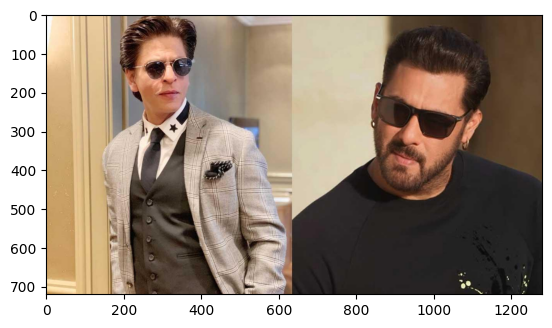

In [11]:
img = mpimg.imread('image.jpg')
imgplot = plt.imshow(img)
plt.show()

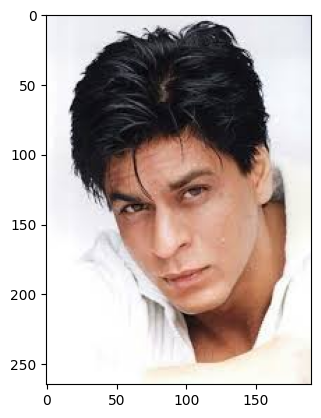

In [12]:
img2 = mpimg.imread('target2.jpeg')
imgplot = plt.imshow(img2)
plt.show()

In [13]:
def compare_and_mark_faces(main_image_path, target_image_path):
    
    # Load the main image and the target image
    main_image = face_recognition.load_image_file(main_image_path)
    target_image = face_recognition.load_image_file(target_image_path)

    # Find face locations and face encodings for the main and target images
    main_face_locations = face_recognition.face_locations(main_image)
    target_face_locations = face_recognition.face_locations(target_image)
    
    main_face_encodings = face_recognition.face_encodings(main_image, main_face_locations)
    target_face_encodings = face_recognition.face_encodings(target_image, target_face_locations)

    # Create a copy of the main image for visualization
    main_image_marked = np.copy(main_image)

    # Iterate through faces in the main image
    for main_face_location, main_face_encoding in zip(main_face_locations, main_face_encodings):
        # Compare the face encoding with all face encodings in the target image
        results = face_recognition.compare_faces(target_face_encodings, main_face_encoding)

        # Check if there is at least one match
        if True in results:
            # Find the index of the first matching face in the target image
            target_index = results.index(True)

            # Draw a red bounding box around the matching face in the main image
            top, right, bottom, left = main_face_location
            cv2.rectangle(main_image_marked, (left, top), (right, bottom), (0, 0, 255), 2)

    # Display the marked main image
    #cv2.imshow('Face Matching with Marking', main_image_marked)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    plt.imshow(main_image_marked)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Specify the paths to the main image and the target image
main_image_path = 'image.jpg'
target_image_path = 'target2.jpeg'

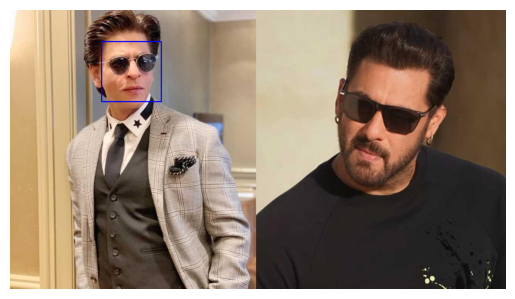

In [14]:
# Call the function for face comparison and marking
compare_and_mark_faces(main_image_path, target_image_path)